# Homework 4: Functions, Histograms, and Groups

**Reading**: Textbook chapter [7.2](https://umass-data-science.github.io/190fwebsite/textbook/07/2/visualizing-numerical-distributions/) and chapter [8](https://umass-data-science.github.io/190fwebsite/textbook/08/functions-and-tables/).

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the provided tests. Each time you start your server, you will need to execute this cell again to load the tests.

Homework 4 is due Thursday, 2/15 at 11:59pm. Start early so that you can come to office hours if you're stuck. Check the website for the office hours schedule.
You will receive an early submission bonus point if you turn in your final submission by Wednesday, 2/14 at 11:59pm. Late work will not be accepted as per the [policies](https://umass-data-science.github.io/190fwebsite/policy/) of this course. 

Throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook! For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Moreover, please be sure to only put your written answers in the provided cells. 

In [1]:
# Don't change this cell; just run it. 
! pip install -U okpy

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.\n",
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from client.api.notebook import Notebook
ok = Notebook('hw04.ok')
_ = ok.auth(inline=True)

Requirement already up-to-date: okpy in /home/mjasim/anaconda3/lib/python3.6/site-packages (1.13.11)
You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Assignment: Homework 4: Functions, Histograms, and Groups
OK, version v1.13.11



ERROR  | auth.py:91 | {'error': 'invalid_grant'}



Open the following URL:

https://okpy.org/client/login/

After logging in, copy the code from the web page and paste it into the box.
Then press the "Enter" key on your keyboard.

Paste your code here: Dot3Hk9FYEfNzCbi1J7rGPgm8ySrPZ
Successfully logged in as mahmood.jasim.bd@gmail.com


## 1. Working with Text using Functions


The following table contains the words from four chapters of Charles Dickens' [*A Tale of Two Cities*](http://www.gutenberg.org/cache/epub/98/pg98.txt).  We're going to compute some simple facts about each chapter.  Since we're performing the same computation on each chapter, it's best to encapsulate each computational procedure in a function, and then call the function several times. Run the cell to get a table with one column.

In [27]:
# Just run this cell to load the data.
tale_chapters = Table.read_table("tale.csv")
tale_chapters

Chapter text
"I. The Period It was the best of times, it was the wor ..."
"II. The Mail It was the Dover road that lay, on a Frid ..."
III. The Night Shadows A wonderful fact to reflect upo ...
IV. The Preparation When the mail got successfully to ...


**Question 1.** Write a function called `word_count` that takes a single argument, the text of a single chapter, and returns the number of words in that chapter.  Assume that words are separated from each other by spaces. 

*Hint:* Try the string method [`split`](https://docs.python.org/3/library/stdtypes.html#str.split) and the function [`len`](https://docs.python.org/3/library/functions.html#len).

In [3]:
def word_count(text):
    ...
    
word_count(tale_chapters.column("Chapter text").item(0))

In [4]:
#Solution
def word_count(text):
    return len(text.split(' '))
    
    
word_count(tale_chapters.column("Chapter text").item(0))

911

In [5]:
_ = ok.grade('q1_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Question 1_1 > Suite 1 > Case 1

>>> word_count(tale_chapters.column("Chapter text").item(0))
911

# Error: expected
#     1005
# but got
#     911

Run only this test case with "python3 ok -q q1_1 --suite 1 --case 1"
---------------------------------------------------------------------
Test summary
    Passed: 0
    Failed: 1
[k..........] 0.0% passed



**Question 2.** Use the `apply` function on the table from before to create an array called `chapter_lengths` which contains the length of each chapter in `tale_chapters`.

In [6]:
chapter_lengths = ...
chapter_lengths

Ellipsis

In [7]:
#Solution
chapter_lengths = tale_chapters.apply(word_count,"Chapter text")
chapter_lengths

array([1005, 2016, 1613, 4382])

In [8]:
_ = ok.grade('q1_2')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 3.** Write a function called `character_count`.  It should take a string as its argument and return the number of characters in that string that aren't spaces (" "), periods ("."), exclamation marks ("!"), or question marks ("?"). Remember that `tale_chapters` is a table, and that the function takes in only the text of one chapter as input.

*Hint:* Try using the string method `replace` several times to remove the characters we don't want to count.

In [9]:
...

Ellipsis

In [7]:
#Solution
def character_count(text):
    for c in [" ", ".", "!", "?"]:
        text = text.replace(c,"")
    return len(text)

In [8]:
_ = ok.grade('q1_3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 4.** Write a function called `chapter_number`.  It should take a single argument, the text of a chapter from our dataset, and return the number of that chapter, as a Roman numeral.  (For example, it should return the string "I" for the first chapter and "II" for the second.)  If the argument doesn't have a chapter number in the same place as the chapters in our dataset, `chapter_number` can return whatever you like.

To help you with this, we've included a function called `text_before`.  Its documentation describes what it does.

In [9]:
def text_before(full_text, pattern):
    """Finds all the text that occurs in full_text before the specified pattern.

    Parameters
    ----------
    full_text : str
        The text we want to search within.
    param2 : str
        The thing we want to search for.

    Returns
    -------
    str
        All the text that occurs in full_text before pattern.  If pattern
        doesn't appear anywhere, all of full_text is returned.
    
    Examples
    --------
    
    >>> text_before("The rain in Spain falls mainly on the plain.", "Spain")
    'The rain in '
    >>> text_before("The rain in Spain falls mainly on the plain.", "ain")
    'The r'
    >>> text_before("The rain in Spain falls mainly on the plain.", "Portugal")
    'The rain in Spain falls mainly on the plain.'
    """
    return np.array(full_text.split(pattern)).item(0)

def chapter_number(chapter_text):
    ...

In [10]:
#Solution
def chapter_number(chapter_text):
    temp = text_before(chapter_text, ".")
    if(temp != chapter_text):
        return(temp)
    else:
        return "Not found"

In [11]:
_ = ok.grade('q1_4')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## 2. Uber


Below we load tables containing 200,000 weekday Uber rides in the Manila, Philippines, and Boston, Massachusetts metropolitan areas from the [Uber Movement](https://movement.uber.com) project. The `sourceid` and `dstid` columns contain codes corresponding to start and end locations of each ride. The `hod` column contains codes corresponding to the hour of the day the ride took place. The `ride time` table contains the length of the ride, in minutes.

In [12]:
boston = Table.read_table("boston.csv")
manila = Table.read_table("manila.csv")
print("Boston")
boston.show(4)
print("Manila")
manila.show(4)

Boston


sourceid,dstid,hod,ride time
584,33,7,11.866
1013,1116,13,17.7993
884,1190,22,19.3488
211,364,1,1.7235


Manila


sourceid,dstid,hod,ride time
544,5,22,22.8115
302,240,21,7.02267
278,99,16,21.6437
720,775,18,13.0597


**Question 1**
Produce histograms of all ride times in Boston and in Manila, using the given bins. Please put the code for both of them in the following cell, and put the ride times for Boston first.  

In [13]:
bins = np.arange(0, 120, 5)
...
...

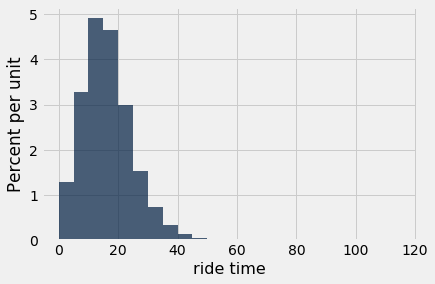

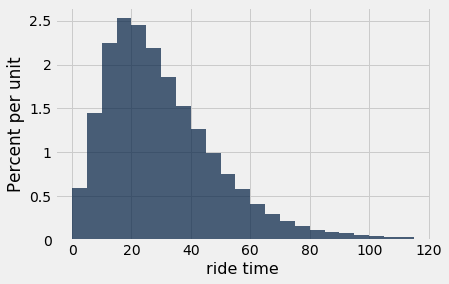

In [14]:
bins = np.arange(0, 120, 5)

boston.hist("ride time", bins=bins)
manila.hist("ride time", bins=bins)

** Question 2** Set the two variables below to estimates of what percentage of rides are less than 10 minutes in Boston and Manila. Find your estimates by visually assessing the histograms. Your solution should consist of only mathematical operations and numbers.

In [15]:
boston_under_10 = ...
manila_under_10 = ...

In [16]:
boston_under_10 = 5*(1.5+3.3)
manila_under_10 = 5*(0.6 + 1.45)

**Question 3** Comment on the main difference between the two histograms. What might be causing this?

**Your Solution Here**:

**The following two questions are optional!** 

Please do make an attempt at them, but they will not be incorporated into the final grading of this homework. 

**Optional Question 4** The `hod` column in each table represents the hour of the day during which the Uber was called. 0 corresponds to 12-1 AM, 1 to 1-2 AM, 13 to 1-2 PM, etc. Write a function which takes in a table like `boston` or `manila`, and an `hod` number between 0 and 23, and displays a histogram of ride lengths from that hour in that city. Use the same bins as before.

In [17]:
def hist_for_time(tbl, hod):
    bins = np.arange(0, 120, 5)
    ...

#DO NOT DELETE THIS LINE! 
hist_for_time(boston, 12)

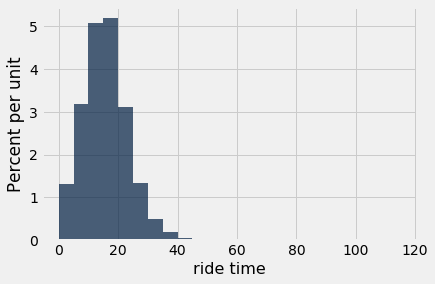

In [18]:
#Solution
def hist_for_time(tbl, hod):
    bins = np.arange(0, 120, 5)
    filtered = tbl.where("hod",are.equal_to(hod))
    filtered.hist("ride time", bins=bins)

#DO NOT DELETE THIS LINE! 
hist_for_time(boston, 12)

**Optional Question 5** Between the two cities, which has a larger difference between Uber calls at 10 AM and 10 PM? Use the function you just created to answer this question. Include the code you need to come up with an answer below.

Assign `larger_diff` to the number 1 if the answer is Manila, and 2 if the answer is Boston. 

In [19]:
larger_diff = ... 

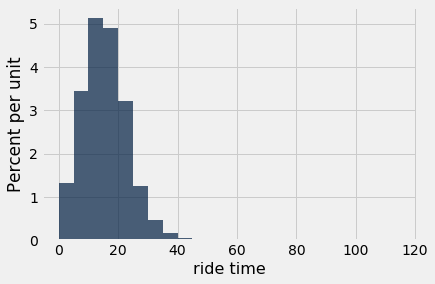

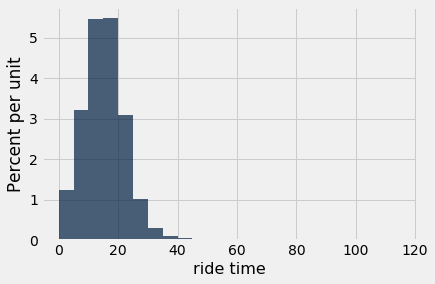

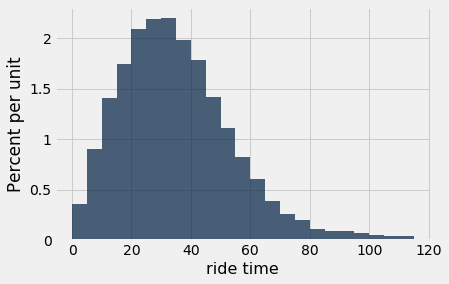

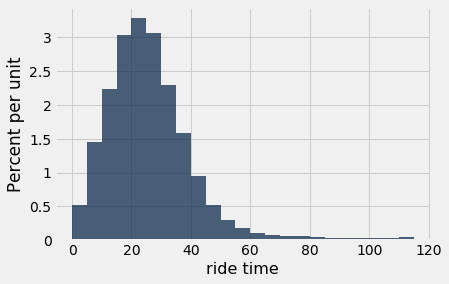

In [20]:
#Solution
hist_for_time(boston, 10)
hist_for_time(boston, 22)
hist_for_time(manila, 10)
hist_for_time(manila, 22)
larger_diff = 1

In [21]:
_ = ok.grade('q2_5')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## 3. Faculty salaries


In the next cell, we load a dataset compiled by the [Daily Cal](http://projects.dailycal.org/paychecker/) about UC Berkeley (where this course was created). It includes information on faculty, their departments, their positions, and their gross salaries in 2015. 

In [22]:
profs = Table.read_table("faculty.csv").where("year", are.equal_to(2015))\
                                       .drop("year", "title")\
                                       .relabeled("title_category", "position")
profs

name,department,position,gross_salary
CYNTHIA ABAN,South & Southeast Asian Studies,lecturer,64450
PIETER ABBEEL,Computer Science,associate professor,184998
SALLY ABEL,Law,lecturer,3466
ELIZABETH ABEL,English,professor,138775
DOR ABRAHAMSON,Education,associate professor,100300
KATHRYN ABRAMS,Law,professor,319693
BARBARA ABRAMS,Public Health,professor,191162
SARAH ACCOMAZZO,Social Welfare,lecturer,14779
CHARISMA ACEY,City and Regional Planning,assistant professor,101567
DAVID ACKERLY,Biology,professor,182288


We want to use this table to generate arrays with the names of each professor in each department.

**Question 1** Set `prof_names` to a table with two columns. The first column should be called "department" and have the name of every department once, and the second column should be called "faculty" and contain an *array* of the names of all faculty members in that department. 

*Hint:* Think about how ```group``` works: it collects values into an array and then applies a function to that array. We have defined two functions below for you, and you will need to use one of them in your call to ```group```. If you're not sure which to use, try experimenting with both!

In [23]:
# Pick between the two functions defined below 
def identity(array):
    return array 

def first(array):
    return array.item(0)

In [24]:
prof_names = ...
prof_names

Ellipsis

In [25]:
#Solution
prof_names = profs.select("department","name").group("department",identity)
prof_names = prof_names.relabeled("name identity","faculty")
prof_names

department,faculty
African American Studies,['AYA DE LEON' 'CHIYUMA ELLIOTT' 'NIKKI JONES' 'DAVID KY ...
Agricultural and Resource Economics and Policy,['MAXIMILIAN AUFFHAMMER' 'CHARLES GIBBONS' 'JEFFREY PERL ...
Anthroplogy,['SABRINA AGARWAL' 'STANLEY BRANDES' 'CHARLES BRIGGS' ' ...
Architecture,['MARK ANDERSON' 'JACOB ATHERTON' 'WILLIAM ATWOOD' 'R.GA ...
Art History,['DILIANA ANGELOVA' 'PATRICIA BERGER' 'JULIA BRYAN-WILSO ...
Art Practice,['ALLAN DESOUZA' 'AIDA GAMEZ' 'RANDY HUSSONG' 'JENNIFER ...
Astronomy,['GIBOR BASRI' 'STEVEN BECKWITH' 'LEO BLITZ' 'EUGENE CHI ...
Bioengineering,['ADAM ARKIN' 'IRINA CONBOY' 'STEVEN CONOLLY' 'JOHN DUEB ...
Biology,['DAVID ACKERLY' 'HILLEL ADESNIK' 'KELLY AGNEW' 'DORIS B ...
Buddhist Studies,['JANN RONIS']


In [26]:
_ = ok.grade('q3_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



 ** Question 2 ** At the moment, the `name` column of `profs` is sorted by last name. Would the arrays you generated in the previous part be the same as if we had sorted by first name instead? When we say that two arrays are the same, we mean that they contain the same number of elements and the elements in the corresponding positions are identical. Explain your answer. If you feel you need to make certain assumptions about the data, feel free to state them in your response. 

*Write your answer here, replacing this text.*

**Question 3** Set `biggest_range_dept` to the name of the department with the largest salary range, where range is defined as the difference between the lowest and highest salaries in the department. 

*Hint:* First you'll need to define a new function `salary_range` which takes in an array of salaries and returns the salary range of the corresponding department. Think about what functions we have discussed can combine and give you this range. Then, set `department_ranges` to a table containing the names and salary ranges of each department. 

In [30]:
# Define salary_range in this cell
...
    ...

IndentationError: unexpected indent (<ipython-input-30-3c1a29d87616>, line 3)

In [31]:
department_ranges = ...
biggest_range_dept = ...
biggest_range_dept

Ellipsis

In [32]:
#Solution
def salary_range(data):
    return max(data)-min(data)

department_ranges = profs.select("department","gross_salary").group("department",salary_range)
department_ranges = department_ranges.sort("gross_salary salary_range",'descending')
biggest_range_dept = department_ranges.column("department").item(0)
biggest_range_dept

'Economics'

In [33]:
_ = ok.grade('q3_3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## 4. Submission


Once you're finished, select "Save and Checkpoint" in the File menu and then execute the `submit` cell below. The result will contain a link that you can use to check that your assignment has been submitted successfully. If you submit more than once before the deadline, we will only grade your final submission. If you mistakenly submit the wrong one, you can head to [okpy.org](https://okpy.org/) and flag the correct version. To do so, go to the website, click on this assignment, and find the version you would like to be graded. There should be an option to flag that submission for grading!

In [34]:
# For your convenience, you can run this cell to run all the tests at once!
import os
print("Running all tests...")
_ = [ok.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q')]
print("Finished running all tests.")

Running all tests...
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running t

In [35]:
_ = ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Could not save your notebook. Make sure your notebook is saved before sending it to OK!
Submit... 100% complete
Submission successful for user: mahmood.jasim.bd@gmail.com
URL: https://okpy.org/umass/compsci190F/fa18/hw04/submissions/N9GYEN

